* a + b + c = 1000
* a^2 + b^2 = c^2
* possible combinations of a, b, c as natural numbers?

time.time() method of Time module is used to get the time in seconds since epoch. The handling of leap seconds is platform dependent.

In [24]:
import time

start_time = time.time()
for a in range(0, 1001):
    for b in range(0, 1001):
        c = 1000 - a - b
        if a**2 + b**2 == c**2:
            print("a, b, c : %d, %d, %d" % (a, b, c))
end_time = time.time()
print("time:%f" % (end_time - start_time))

a, b, c : 0, 500, 500
a, b, c : 200, 375, 425
a, b, c : 375, 200, 425
a, b, c : 500, 0, 500
time:0.390625


In [25]:
time.time()

1710619060.380872

In [2]:
from timeit import Timer

In [ ]:
li1 = [1, 2]
li2 = [23, 5]

li = li1 + li2
li = [i for i in range(10000)]
li = list(range(1000))  # 可迭代对象转换成列表
li = []
for i in range(10000):
    li.append(i)

In [3]:
def test1():
    li = []
    for i in range(10000):
        li.append(i)

In [20]:
def test2():
    li = []
    for i in range(10000):
        li = li + [i]

In [ ]:
def test22():  # the speed is similar to extend, due to += optimization
    li = []
    for i in range(10000):
        li += [i]

In [5]:
def test3():
    li = [i for i in range(10000)]

In [6]:
def test4():
    li = list(range(10000))

In [15]:
def test5():
    li = []
    for i in range(10000):
        li.extend([i])

In [7]:
# append
timer1 = Timer("test1()", "from __main__ import test1")
timer1.timeit(1000)

0.6667247639852576

In [21]:
# +
timer2 = Timer("test2()", "from __main__ import test2")  # __main__ 当前启动文件
timer2.timeit(1000)

167.2241275680135

In [10]:
# list comprehension
timer3 = Timer("test3()", "from __main__ import test3")  # __main__ 当前启动文件
timer3.timeit(1000)

0.4733084879699163

In [11]:
# list(iterable)
timer4 = Timer("test4()", "from __main__ import test4")  # __main__ 当前启动文件
timer4.timeit(1000)

0.23037008702522144

In [14]:
# extend
timer5 = Timer("test5()", "from __main__ import test5")  # __main__ 当前启动文件
timer5.timeit(1000)

1.0799629379762337

"+" and extend takes the longest
form an empty list
add elements from two lists to this empty list

In [18]:
# insert from beginning
def test6():
    li = []
    for i in range(10000):
        li.insert(0, i)

In [19]:
# insert
timer6 = Timer("test6()", "from __main__ import test6")  # __main__ 当前启动文件
timer6.timeit(1000)

16.301647381973453

数据储存方式决定效率，appending at the end is faster than inserting from the beginning

In [23]:
a = 1
print(id(a))

4369628504


Important functions:
* is_empty() 链表是否为空
* length() 链表长度
* travel() 遍历链表
* add(item) 链表头部添加
* append(item) 链表尾部添加
* insert(pos, item) 指定位置添加
* remove(item) 删除节点
* search(item) 查找节点是否存在

## Linked List

In [2]:
class SingleNode(object):
    """单链表的结点"""

    def __init__(self, item):
        # _item存放数据元素
        self.item = item
        # _next是下一个节点的标识
        self.next = None

In [19]:
class SingleLinkList(object):
    """单链表"""

    def __init__(self, node=None):
        self.__head = node

    def is_empty(self):
        """判断链表是否为空"""
        return self.__head == None

    def length(self):
        """链表长度"""
        # cur初始时指向头节点
        cur = self.__head
        count = 0
        # 尾节点指向None，当未到达尾部时
        while cur != None:
            count += 1
            # 将cur后移一个节点
            cur = cur.next
        return count

    def travel(self):
        """遍历链表"""
        cur = self.__head
        while cur != None:
            print(cur.item, end=" ")
            cur = cur.next

    def add(self, item):
        """头部添加元素"""
        # 先创建一个保存item值的节点
        node = SingleNode(item)
        # 将新节点的链接域next指向头节点，即_head指向的位置
        node.next = self.__head
        # 将链表的头_head指向新节点
        self.__head = node

    def append(self, item):
        """尾部添加元素"""
        node = SingleNode(item)
        # 先判断链表是否为空，若是空链表，则将_head指向新节点
        if self.is_empty():
            self.__head = node
        # 若不为空，则找到尾部，将尾节点的next指向新节点
        else:
            cur = self.__head
            while cur.next != None:
                cur = cur.next
            cur.next = node

    def insert(self, pos, item):
        """指定位置添加元素"""
        # 若指定位置pos为第一个元素之前，则执行头部插入
        if pos <= 0:
            self.add(item)
        # 若指定位置超过链表尾部，则执行尾部插入
        elif pos > (self.length() - 1):
            self.append(item)
        # 找到指定位置
        else:
            node = SingleNode(item)
            count = 0
            # pre用来指向指定位置pos的前一个位置pos-1，初始从头节点开始移动到指定位置
            pre = self.__head
            while count < (pos - 1):
                count += 1
                pre = pre.next
            # 先将新节点node的next指向插入位置的节点
            node.next = pre.next
            # 将插入位置的前一个节点的next指向新节点
            pre.next = node

    def remove(self, item):
        """删除节点"""
        cur = self.__head
        pre = None
        while cur != None:
            # 找到了指定元素
            if cur.item == item:
                # 如果第一个就是删除的节点
                # 头节点
                if not pre:
                    # 将头指针指向头节点的后一个节点
                    self.__head = cur.next
                else:
                    # 中间节点
                    # 将删除位置前一个节点的next指向删除位置的后一个节点
                    pre.next = cur.next
                break
            else:
                # 继续按链表后移节点
                pre = cur
                cur = cur.next

    def search(self, item):
        """链表查找节点是否存在，并返回True或者False"""
        cur = self.__head
        while cur != None:
            if cur.item == item:
                return True
            cur = cur.next
        return False

In [18]:
if __name__ == "__main__":
    ll = SingleLinkList()
    ll.add(1)
    ll.add(2)
    ll.append(3)
    ll.insert(2, 4)
    print("length:", ll.length())
    ll.travel()
    print(ll.search(3))
    print(ll.search(5))
    ll.remove(1)
    print("length:", ll.length())
    ll.travel()

length: 4
2 1 4 3 True
False
length: 3
2 4 3 

Bad pipe message: %s [b'live\r\nAccept: */*\r\nAccess-Control-Request-Me', b'od: GET\r\nAccess-Control-Request-Private-Network: true\r\nOrigin: https://api-322c2749.duosecurity.com\r\nUser-Agent: Mo']
Bad pipe message: %s [b'ep-alive\r\nsec-ch-ua: "Chromium";v="122", "Not(A:Brand";v="24", "Google Chrome";v="122"\r\nAccept: text/plain', b'*/*; q=0.01\r\nsec-ch-ua-mobile: ?0\r\nUser-Age']
Bad pipe message: %s [b': Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/122.0.0.0 Saf']
Bad pipe message: %s [b'i/537.36\r\nsec-ch-ua-platform: "macOS"\r\nOrigin: https://api-322c2749.duosecurity.com\r\nSec-Fetch-S']
Bad pipe message: %s [b'e: cross-site\r\nSec-Fetch-Mode: cors\r\nSec-Fetch-Dest: empty\r\nAccept-Encoding: gzip, deflate, br, zstd\r\nAc']


In [27]:
class SinCycLinkedlist(object):
    """单向循环链表"""

    def __init__(self, node=None):
        self.__head = None
        if node:
            node.next = node

    def is_empty(self):
        """判断链表是否为空"""
        return self.__head == None

    def length(self):
        """返回链表的长度"""
        # 如果链表为空，返回长度0
        if self.is_empty():
            return 0
        count = 1
        cur = self.__head
        while cur.next != self.__head:
            count += 1
            cur = cur.next
        return count

    def travel(self):
        """遍历链表"""
        if self.is_empty():
            return
        cur = self.__head
        print(cur.item, end=" ")
        while cur.next != self.__head:
            cur = cur.next
            print(cur.item, end=" ")

    def add(self, item):
        """头部添加节点"""
        node = SingleNode(item)
        if self.is_empty():
            self.__head = node
            node.next = self.__head
        else:
            # 添加的节点指向_head
            node.next = self.__head
            # 移到链表尾部，将尾部节点的next指向node
            cur = self.__head
            while cur.next != self.__head:
                cur = cur.next
            cur.next = node
            # _head指向添加node的
            self.__head = node

    def append(self, item):
        """尾部添加节点"""
        node = SingleNode(item)
        if self.is_empty():
            self.__head = node
            node.next = self.__head
        else:
            # 移到链表尾部
            cur = self.__head
            while cur.next != self.__head:
                cur = cur.next
            # 将尾节点指向node
            cur.next = node
            # 将node指向头节点_head
            node.next = self.__head

    def insert(self, pos, item):
        """在指定位置添加节点"""
        if pos <= 0:
            self.add(item)
        elif pos > (self.length() - 1):
            self.append(item)
        else:
            node = SingleNode(item)
            cur = self.__head
            count = 0
            # 移动到指定位置的前一个位置
            while count < (pos - 1):
                count += 1
                cur = cur.next
            node.next = cur.next
            cur.next = node

    def remove(self, item):
        """删除一个节点"""
        # 若链表为空，则直接返回
        if self.is_empty():
            return
        # 将cur指向头节点
        cur = self.__head
        pre = None
        # 若头节点的元素就是要查找的元素item
        if cur.item == item:
            # 如果链表不止一个节点
            if cur.next != self.__head:
                # 先找到尾节点，将尾节点的next指向第二个节点
                while cur.next != self.__head:
                    cur = cur.next
                # cur指向了尾节点
                cur.next = self.__head.next
                self.__head = self.__head.next
            else:
                # 链表只有一个节点
                self.__head = None
        else:
            pre = self.__head
            # 第一个节点不是要删除的
            while cur.next != self.__head:
                # 找到了要删除的元素
                if cur.item == item:
                    # 删除
                    pre.next = cur.next
                    return
                else:
                    pre = cur
                    cur = cur.next
            # cur 指向尾节点
            if cur.item == item:
                # 尾部删除
                pre.next = cur.next

    def search(self, item):
        """查找节点是否存在"""
        if self.is_empty():
            return False
        cur = self.__head
        if cur.item == item:
            return True
        while cur.next != self.__head:
            cur = cur.next
            if cur.item == item:
                return True
        return False


if __name__ == "__main__":
    ll = SinCycLinkedlist()
    ll.add(1)
    ll.add(2)
    ll.append(3)
    ll.insert(2, 4)
    ll.insert(4, 5)
    ll.insert(0, 6)
    print("length:", ll.length())
    ll.travel()
    print(ll.search(3))
    print(ll.search(7))
    ll.remove(1)
    print("length:", ll.length())
    ll.travel()

length: 6
6 2 1 4 3 5 True
False
length: 5
6 2 4 3 5 

In [35]:
class Node(object):
    """双向链表节点"""

    def __init__(self, item):
        self.item = item
        self.next = None
        self.prev = None


class DLinkList(object):
    """双向链表"""

    def __init__(self, node=None):
        self.__head = node

    def is_empty(self):
        """判断链表是否为空"""
        return self.__head == None

    def length(self):
        """返回链表的长度"""
        cur = self.__head
        count = 0
        while cur != None:
            count += 1
            cur = cur.next
        return count

    def travel(self):
        """遍历链表"""
        cur = self.__head
        while cur != None:
            print(cur.item, end=" ")
            cur = cur.next

    def add(self, item):
        """头部插入元素"""
        node = Node(item)
        if self.is_empty():
            # 如果是空链表，将_head指向node
            self.__head = node
        else:
            # 将node的next指向_head的头节点
            node.next = self.__head
            # 将_head的头节点的prev指向node
            self.__head.prev = node
            # 将_head 指向node
            self.__head = node

    def append(self, item):
        """尾部插入元素"""
        node = Node(item)
        if self.is_empty():
            # 如果是空链表，将_head指向node
            self.__head = node
        else:
            # 移动到链表尾部
            cur = self.__head
            while cur.next != None:
                cur = cur.next
            # 将尾节点cur的next指向node
            cur.next = node
            # 将node的prev指向cur
            node.prev = cur

    def search(self, item):
        """查找元素是否存在"""
        cur = self.__head
        while cur != None:
            if cur.item == item:
                return True
            cur = cur.next
        return False

    def insert(self, pos, item):
        """在指定位置添加节点"""
        if pos <= 0:
            self.add(item)
        elif pos > (self.length() - 1):
            self.append(item)
        else:
            node = Node(item)
            cur = self.__head
            count = 0
            # 移动到指定位置的前一个位置
            while count < (pos - 1):
                count += 1
                cur = cur.next
            # 将node的prev指向cur
            node.prev = cur
            # 将node的next指向cur的下一个节点
            node.next = cur.next
            # 将cur的下一个节点的prev指向node
            cur.next.prev = node
            # 将cur的next指向node
            cur.next = node

    def remove(self, item):
        """删除元素"""
        if self.is_empty():
            return
        else:
            cur = self.__head
            if cur.item == item:
                # 如果首节点的元素即是要删除的元素
                if cur.next == None:
                    # 如果链表只有这一个节点
                    self.__head = None
                else:
                    # 将第二个节点的prev设置为None
                    cur.next.prev = None
                    # 将_head指向第二个节点
                    self.__head = cur.next
                return
            while cur != None:
                if cur.item == item:
                    # 将cur的前一个节点的next指向cur的后一个节点
                    cur.prev.next = cur.next
                    if cur.next != None:
                        # 将cur的后一个节点的prev指向cur的前一个节点
                        cur.next.prev = cur.prev
                    break
                cur = cur.next

In [43]:
if __name__ == "__main__":
    ll = DLinkList()
    ll.add(1)
    ll.add(2)
    ll.append(3)
    ll.insert(2, 4)
    ll.insert(4, 5)
    ll.insert(0, 6)
    print("length:", ll.length())
    ll.travel()
    print(" ")
    print(ll.search(3))
    print(ll.search(4))
    ll.remove(1)
    print("length:", ll.length())
    ll.travel()
    ll.remove(5)
    print(" ")
    print("length:", ll.length())
    ll.travel()

length: 6
6 2 1 4 3 5  
True
True
length: 5
6 2 4 3 5  
length: 4
6 2 4 3 

## Stack (LIFO, Last In First Out)

Stack() 创建一个新的空栈
* push(item) 添加一个新的元素item到栈顶
* pop() 弹出栈顶元素
* peek() 返回栈顶元素
* is_empty() 判断栈是否为空
* size() 返回栈的元素个数

In [44]:
class Stack(object):
    """栈"""

    def __init__(self):
        self.items = []

    def is_empty(self):
        """判断是否为空"""
        return self.items == []

    def push(self, item):
        """加入元素"""
        self.items.append(item)

    def pop(self):
        """弹出元素"""
        return self.items.pop()

    def peek(self):
        """返回栈顶元素"""
        if self.items:
            return self.items[len(self.items) - 1]
        else:
            return None

    def size(self):
        """返回栈的大小"""
        return len(self.items)


if __name__ == "__main__":
    stack = Stack()
    stack.push("hello")
    stack.push("world")
    stack.push("itcast")
    print(stack.size())
    print(stack.peek())
    print(stack.pop())
    print(stack.pop())
    print(stack.pop())

3
itcast
itcast
world
hello


## Queue (First In First Out)

Queue() 创建一个空的队列
* enqueue(item) 往队列中添加一个item元素
* dequeue() 从队列头部删除一个元素
* is_empty() 判断一个队列是否为空
* size() 返回队列的大小

In [45]:
class Queue(object):
    """队列"""

    def __init__(self):
        self.items = []

    def is_empty(self):
        return self.items == []

    def enqueue(self, item):
        """进队列"""
        self.items.insert(0, item)

    def dequeue(self):
        """出队列"""
        return self.items.pop()

    def size(self):
        """返回大小"""
        return len(self.items)


if __name__ == "__main__":
    q = Queue()
    q.enqueue("hello")
    q.enqueue("world")
    q.enqueue("itcast")
    print(q.size())
    print(q.dequeue())
    print(q.dequeue())
    print(q.dequeue())

3
hello
world
itcast


Deque() 创建一个空的双端队列
* add_front(item) 从队头加入一个item元素
* add_rear(item) 从队尾加入一个item元素
* remove_front() 从队头删除一个item元素
* remove_rear() 从队尾删除一个item元素
* is_empty() 判断双端队列是否为空
* size() 返回队列的大小

In [46]:
class Deque(object):
    """双端队列"""

    def __init__(self):
        self.items = []

    def is_empty(self):
        """判断队列是否为空"""
        return self.items == []

    def add_front(self, item):
        """在队头添加元素"""
        self.items.insert(0, item)

    def add_rear(self, item):
        """在队尾添加元素"""
        self.items.append(item)

    def remove_front(self):
        """从队头删除元素"""
        return self.items.pop(0)

    def remove_rear(self):
        """从队尾删除元素"""
        return self.items.pop()

    def size(self):
        """返回队列大小"""
        return len(self.items)


if __name__ == "__main__":
    deque = Deque()
    deque.add_front(1)
    deque.add_front(2)
    deque.add_rear(3)
    deque.add_rear(4)
    print(deque.size())
    print(deque.remove_front())
    print(deque.remove_front())
    print(deque.remove_rear())
    print(deque.remove_rear())

4
2
1
4
3


## Sorting Algorithm

* Bubble Sort

In [52]:
def bubble_sort(alist):
    n = len(alist)
    for j in range(n - 1):
        count = 0
        for i in range(0, n - 1 - j):
            if alist[i] > alist[i + 1]:
                alist[i], alist[i + 1] = alist[i + 1], alist[i]
                count += 1

        if count == 0:
            break


# i 0 ~ n-2 range(0, n-1) j=0
# j 0 ~ n-3 range(0, n-1-1) j=1
# j 0 ~ n-4 range(0, n-1-2) j=2

In [50]:
def bubble_sort(alist):
    for j in range(len(alist) - 1, 0, -1):  # n-1,...,1
        # j表示每次遍历需要比较的次数，是逐渐减小的
        for i in range(j):
            if alist[i] > alist[i + 1]:
                alist[i], alist[i + 1] = alist[i + 1], alist[i]

In [53]:
li = [54, 26, 93, 17, 77, 31, 44, 55, 20]
bubble_sort(li)
print(li)

[17, 20, 26, 31, 44, 54, 55, 77, 93, 93]


1. 最优时间复杂度：O(n) （表示遍历一次发现没有任何可以交换的元素，排序结束。）
2. 最坏时间复杂度：O(n2)
3. 稳定性：稳定

* Selection Sort

In [63]:
def selection_sort(alist):
    n = len(alist)
    # 需要进行n-1次选择操作
    for i in range(n - 1):
        # 记录最小位置
        min_index = i
        # 从i+1位置到末尾选择出最小数据
        for j in range(i + 1, n):
            if alist[j] < alist[min_index]:
                min_index = j
        # 如果选择出的数据不在正确位置，进行交换
        if min_index != i:
            alist[i], alist[min_index] = alist[min_index], alist[i]

In [64]:
alist = [54, 226, 93, 17, 17, 77, 31, 44, 55, 20, 93]
selection_sort(alist)
print(alist)

[17, 17, 20, 31, 44, 54, 55, 77, 93, 93, 226]


1. 最优时间复杂度：O(n2)
2. 最坏时间复杂度：O(n2)
3. 稳定性：不稳定（考虑升序每次选择最大的情况）

* Insertion Sort

In [73]:
def insert_sort(alist):
    # 从第二个位置，即下标为1的元素开始向前插入
    for i in range(1, len(alist)):
        # 从第i个元素开始向前比较，如果小于前一个元素，交换位置
        for j in range(i, 0, -1):
            if alist[j] < alist[j - 1]:
                alist[j], alist[j - 1] = alist[j - 1], alist[j]

In [74]:
alist = [54, 26, 93, 17, 77, 31, 44, 55, 20]
insert_sort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


1. 最优时间复杂度：O(n) （升序排列，序列已经处于升序状态）
2. 最坏时间复杂度：O(n2)
3. 稳定性：稳定

* Shell Sort

In [77]:
def shell_sort(alist):
    n = len(alist)
    # 初始步长
    gap = n // 2
    while gap > 0:
        # 按步长进行插入排序
        for i in range(gap, n):
            j = i
            # 插入排序
            while j >= gap and alist[j - gap] > alist[j]:
                alist[j - gap], alist[j] = alist[j], alist[j - gap]
                j -= gap
        # 得到新的步长
        gap = gap // 2


alist = [54, 26, 93, 17, 77, 31, 44, 55, 20]
shell_sort(alist)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


1. 最优时间复杂度：根据步长序列的不同而不同
2. 最坏时间复杂度：O(n2)
3. 稳定想：不稳定

* Quick Sort

In [79]:
def quick_sort(alist, start, end):
    """快速排序"""

    # 递归的退出条件
    if start >= end:
        return

    # 设定起始元素为要寻找位置的基准元素
    mid = alist[start]

    # low为序列左边的由左向右移动的游标
    low = start

    # high为序列右边的由右向左移动的游标
    high = end

    while low < high:
        # 如果low与high未重合，high指向的元素不比基准元素小，则high向左移动
        while low < high and alist[high] >= mid:
            high -= 1
        # 将high指向的元素放到low的位置上
        alist[low] = alist[high]

        # 如果low与high未重合，low指向的元素比基准元素小，则low向右移动
        while low < high and alist[low] < mid:
            low += 1
        # 将low指向的元素放到high的位置上
        alist[high] = alist[low]

    # 退出循环后，low与high重合，此时所指位置为基准元素的正确位置
    # 将基准元素放到该位置
    alist[low] = mid

    # 对基准元素左边的子序列进行快速排序
    quick_sort(alist, start, low - 1)

    # 对基准元素右边的子序列进行快速排序
    quick_sort(alist, low + 1, end)


alist = [54, 26, 93, 17, 77, 31, 44, 55, 20]
quick_sort(alist, 0, len(alist) - 1)
print(alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


1. 最优时间复杂度：O(nlogn)
2. 最坏时间复杂度：O(n2)
3. 稳定性：不稳定

* Merge Sort

In [83]:
def merge_sort(alist):
    if len(alist) <= 1:
        return alist
    # 二分分解，使用整数除法确保下标为整数
    num = len(alist) // 2
    left = merge_sort(alist[:num])
    right = merge_sort(alist[num:])
    # 合并
    return merge(left, right)


def merge(left, right):
    """合并操作，将两个有序数组left[]和right[]合并成一个大的有序数组"""
    # left与right的下标指针
    l, r = 0, 0
    result = []
    while l < len(left) and r < len(right):
        if left[l] < right[r]:
            result.append(left[l])
            l += 1
        else:
            result.append(right[r])
            r += 1
    result += left[l:]
    result += right[r:]
    return result


alist = [54, 26, 93, 17, 77, 31, 44, 55, 20]
sorted_alist = merge_sort(alist)
print(sorted_alist)

[17, 20, 26, 31, 44, 54, 55, 77, 93]


1. 最优时间复杂度：O(nlogn)
2. 最坏时间复杂度：O(nlogn)
3. 稳定性：稳定

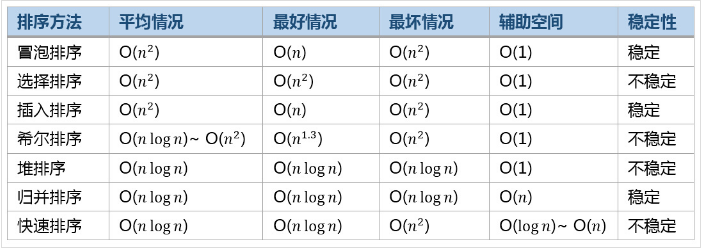

* Binary Search

In [78]:
def binary_search(alist, item):
    if len(alist) == 0:
        return False
    else:
        midpoint = len(alist) // 2
        if alist[midpoint] == item:
            return True
        else:
            if item < alist[midpoint]:
                return binary_search(alist[:midpoint], item)
            else:
                return binary_search(alist[midpoint + 1 :], item)


testlist = [
    0,
    1,
    2,
    8,
    13,
    17,
    19,
    32,
    42,
]
print(binary_search(testlist, 3))
print(binary_search(testlist, 13))

False
True


1. 最优时间复杂度：O(1)
2. 最坏时间复杂度：O(logn)

## Tree

树的术语
1. 节点的度：一个节点含有的子树的个数称为该节点的度；
2. 树的度：一棵树中，最大的节点的度称为树的度；
3. 叶节点或终端节点：度为零的节点；
4. 父亲节点或父节点：若一个节点含有子节点，则这个节点称为其子节点的父节点；
5. 孩子节点或子节点：一个节点含有的子树的根节点称为该节点的子节点；
6. 兄弟节点：具有相同父节点的节点互称为兄弟节点；
7. 节点的层次：从根开始定义起，根为第1层，根的子节点为第2层，以此类推；
8. 树的高度或深度：树中节点的最大层次；
9. 堂兄弟节点：父节点在同一层的节点互为堂兄弟；
10. 节点的祖先：从根到该节点所经分支上的所有节点；
11. 子孙：以某节点为根的子树中任一节点都称为该节点的子孙。
12. 森林：由m（m>=0）棵互不相交的树的集合称为森林；

树的种类
1. 无序树：树中任意节点的子节点之间没有顺序关系，这种树称为无序树，也称为自由树；
2. 有序树：树中任意节点的子节点之间有顺序关系，这种树称为有序树；
    * 二叉树：每个节点最多含有两个子树的树称为二叉树；
        * 完全二叉树：对于一颗二叉树，假设其深度为d(d>1)。除了第d层外，其它各层的节点数目均已达最大值，且第d层所有节点从左向右连续地紧密排列，这样的二叉树被称为完全二叉树，其中满二叉树的定义是所有叶节点都在最底层的完全二叉树;
        * 平衡二叉树（AVL树）：当且仅当任何节点的两棵子树的高度差不大于1的二叉树；
        * 排序二叉树（二叉查找树（英语：Binary Search Tree），也称二叉搜索树、有序二叉树）；
    * 霍夫曼树（用于信息编码）：带权路径最短的二叉树称为哈夫曼树或最优二叉树；
    * B树：一种对读写操作进行优化的自平衡的二叉查找树，能够保持数据有序，拥有多余两个子树。

1. xml，html等，那么编写这些东西的解析器的时候，不可避免用到树
2. 路由协议就是使用了树的算法
3. mysql数据库索引
4. 文件系统的目录结构
5. 所以很多经典的AI算法其实都是树搜索，此外机器学习中的decision tree也是树结构